1.(a)

Write your own R programs to perform Gap test and Permutation test. Then use this program to test if the uniform random numbers generated from Minitab (or SAS, SPSS, Excel) and R are independent.

In [1]:
gap_test = function(alpha, beta, random_number){
    if (alpha > beta){
        cat("beta must be greater than alpha")
    }else{

    # 計算有幾個隨機數
    len = length(random_number)
    # 篩選
    between_number = (1:len) * (random_number > alpha & random_number < beta)        
    between_number_location = between_number[between_number > 0]
    
    # 測試用
    # print(between_number)
    # print(between_number_location)
    
    gap = (between_number_location[-1] - between_number_location[-length(between_number_location)]) - 1
    obs_freq = table(gap)
    
    
    # calculate the chi-square test statistic and p-value
    theoretical_freq = ((beta - alpha) * (1 - beta + alpha)^(c(sort(unique(gap))))) * sum(obs_freq)
    chi_sq_test_stat = sum((obs_freq - theoretical_freq)^2 / theoretical_freq)
    data = cbind(obs_freq, theoretical_freq)
    p_value = 1 - pchisq(chi_sq_test_stat, length(obs_freq) - 1)
    # print(length(obs_freq) - 1)
    # print(chi_sq_test_stat)
    
    cat("          Gap Test          \n")
    cat("============================\n")
    print(data)
    cat("============================\n")
    cat("chi-square statistic:"); cat(chi_sq_test_stat, "\n")
    cat("p-value:"); cat(p_value)
    cat("\n")
    }
}

In [2]:
gap_test(0.2, 0.9, runif(10000))

          Gap Test          
   obs_freq theoretical_freq
0      4917     4.898600e+03
1      1465     1.469580e+03
2       421     4.408740e+02
3       122     1.322622e+02
4        51     3.967866e+01
5        15     1.190360e+01
6         4     3.571079e+00
7         2     1.071324e+00
10        1     2.892574e-02
chi-square statistic:39.26798 
p-value:4.383406e-06


+ 從p-value可知並不拒絕這些亂數是抽自均勻的假設，我們決定進行多次模擬，觀察在特別設定的不同的α值下，拒絕模擬出的亂數是獨立此假設的次數。

[1] 217 154 120  89


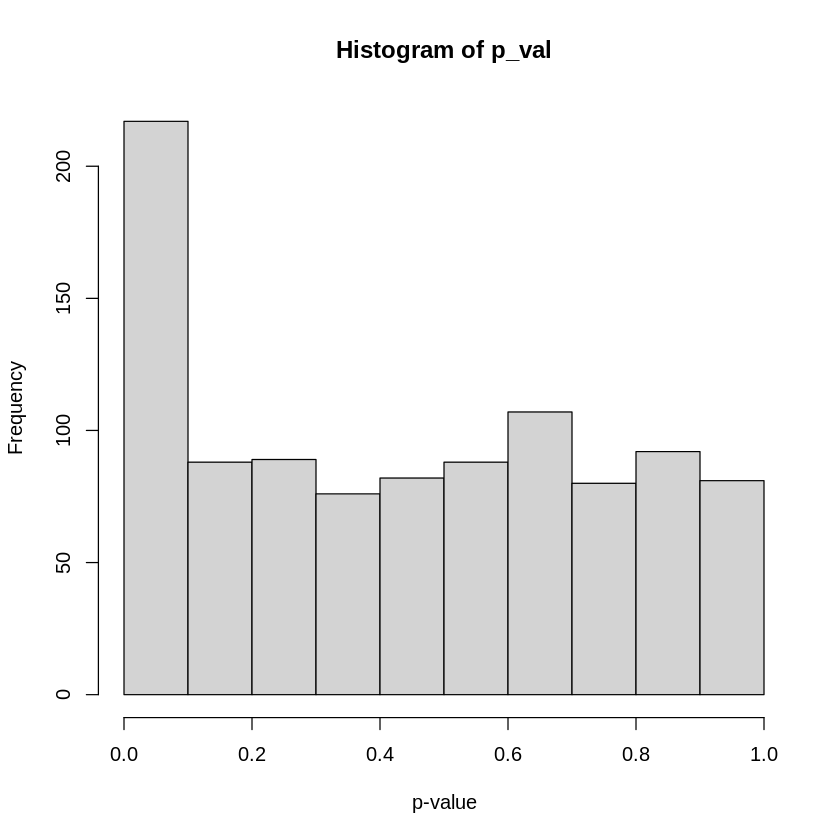

In [3]:
gap_test = function(alpha, beta, random_number){
    if (alpha > beta){
        cat("beta must be greater than alpha")
    }else{

    # 計算有幾個隨機數
    len = length(random_number)
    # 篩選
    between_number = (1:len) * (random_number > alpha & random_number < beta)        
    between_number_location = between_number[between_number > 0]
    
    # 測試用
    # print(between_number)
    # print(between_number_location)
    
    gap = (between_number_location[-1] - between_number_location[-length(between_number_location)]) - 1
    obs_freq = table(gap)
    
    
    # calculate the chi-square test statistic and p-value
    theoretical_freq = ((beta - alpha) * (1 - beta + alpha)^(c(sort(unique(gap))))) * sum(obs_freq)
    chi_sq_test_stat = sum((obs_freq - theoretical_freq)^2 / theoretical_freq)
    data = cbind(obs_freq, theoretical_freq)
    p_value = 1 - pchisq(chi_sq_test_stat, length(obs_freq) - 1)
    }
    return (p_value)
}

p_val = NULL
for (i in 1:1000){
    p_val[i] = gap_test(0.2, 0.9, runif(10000))
}
hist(p_val, xlab = "p-value")

pval01 = length(p_val[p_val < 0.1])
pval005 = length(p_val[p_val < 0.05])
pval0025 = length(p_val[p_val < 0.025])
pval001 = length(p_val[p_val < 0.01])
print(c(pval01, pval005, pval0025, pval001))

In [4]:
permutation_test = function(digit, random_number){
    p_val = NULL
    ten_power = rep(10, each = digit)^(0:(digit - 1))
    M = matrix(random_number, nrow = digit, byrow = FALSE)
    rank_number = apply(M, 2, rank)
    combination = apply(ten_power * rank_number, 2, sum)
    Expectation_Freq = rep(1 / factorial(digit), factorial(digit)) * (length(random_number) / digit) 
    table = table(combination)
    Observe_Freq = table
    
    table1 = cbind(Observe_Freq, Expectation_Freq)
    
    cat("           Permutation Test           \n")
    cat("======================================\n")
    print(table1)
    cat("======================================\n\n")
    p_val = chisq.test(table)[3]
    cat("p-value:", unlist(p_val))    
}

In [5]:
permutation_test(3, runif(12000))

           Permutation Test           
    Observe_Freq Expectation_Freq
123          664         666.6667
132          687         666.6667
213          655         666.6667
231          688         666.6667
312          646         666.6667
321          660         666.6667

p-value: 0.8172168

+ 選擇三位數來做，有六種組合，從p-value可知並不拒絕這些亂數是抽自均勻的假設，我們決定進行多次模擬，觀察在特別設定的不同的α值下，拒絕模擬出的亂數是獨立此假設的次數。

[1] 112  63  36  14


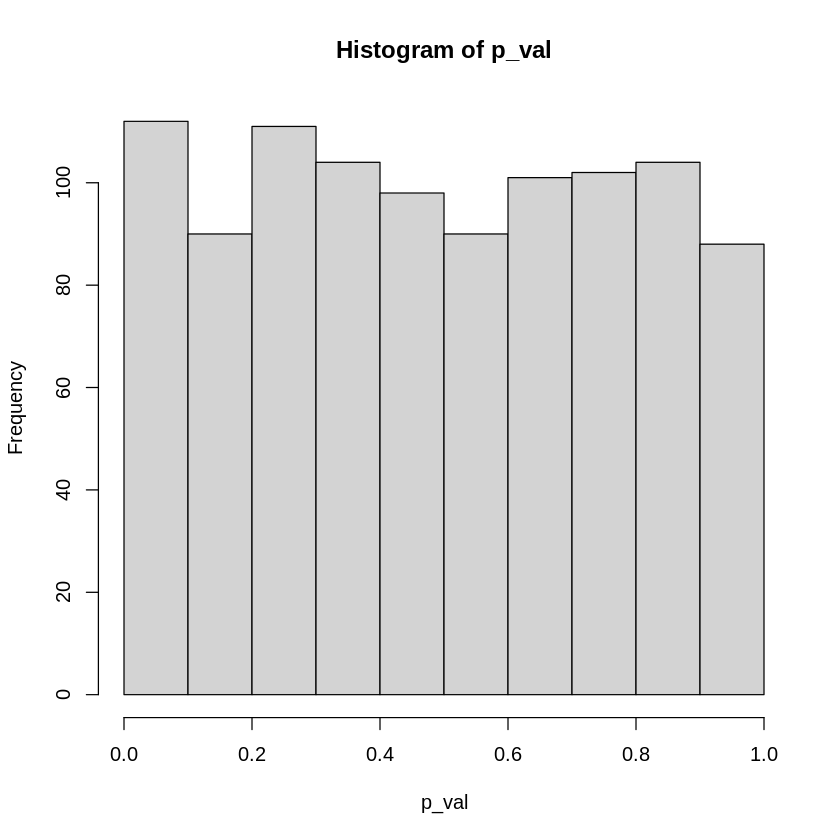

In [6]:
permutation_test = function(digit, random_number){
    p_val = NULL
    ten_power = rep(10, each = digit)^(0:(digit - 1))
    M = matrix(random_number, nrow = digit, byrow = FALSE)
    rank_number = apply(M, 2, rank)
    combination = apply(ten_power * rank_number, 2, sum)
    Expectation_Freq = rep(1 / factorial(digit), factorial(digit)) * (length(random_number) / digit) 
    table = table(combination)
    Observe_Freq = table

    p_val = chisq.test(table)[3]
    return (p_val)    
}

p_val = NULL
for (i in 1:1000){
    p_val[i] = permutation_test(3, runif(12000))
}
p_val = unlist(p_val)
hist(p_val)

pval01 = length(p_val[p_val < 0.1])
pval005 = length(p_val[p_val < 0.05])
pval0025 = length(p_val[p_val < 0.025])
pval001 = length(p_val[p_val < 0.01])
print(c(pval01, pval005, pval0025, pval001))

1.(b) 

Write a small computer program to perform Up-and-down test. Then use this program and uniform random numbers generated from R to check if the mean and variance for the number of runs derived by Levene and Wolfowitz (1944) are valid.

In [7]:
up_and_down_test = function(random_number){
    len = length(random_number)
    average = (2 * len - 1) / 3
    variance = (16 * len - 29) / 90
    zero_and_one = as.numeric(random_number[-1] > random_number[-len])
    sum = sum(zero_and_one[-1] != zero_and_one[-(len - 1)])
    z_score = (sum - average) / sqrt(variance)
    
    cat("  Up and Down Test \n")
    cat("===================\n")
    cat("p-value:", 1 - pnorm(z_score), "\n")
    cat("===================\n")
}

In [8]:
up_and_down_test(runif(10000))

  Up and Down Test 
p-value: 0.9772672 


[1] 91 40 19  7


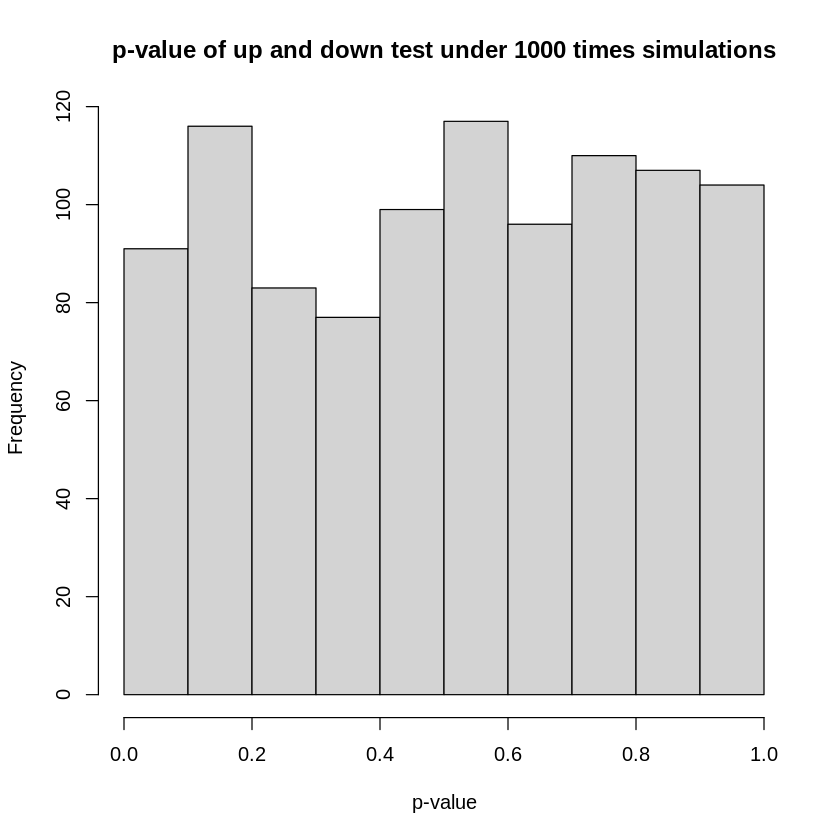

In [9]:
up_and_down_test = function(random_number){
  len = length(random_number)
  average = (2 * len - 1) / 3
  variance = (16 * len - 29) / 90
  zero_and_one = as.numeric(random_number[-1] > random_number[-len])
  sum = sum(zero_and_one[-1] != zero_and_one[-(len - 1)])
  z_score = (sum - average) / sqrt(variance)
  
  return (1 - pnorm(z_score))
}

pv = NULL
for (i in 1:1000){
  pv[i] = up_and_down_test(runif(10000))
}

pv01 = length(pv[pv < 0.1])
pv005 = length(pv[pv < 0.05])
pv0025 = length(pv[pv < 0.025])
pv001 = length(pv[pv < 0.01])
print(c(pv01, pv005, pv0025, pv001))
hist(pv, xlab = "p-value", main = "p-value of up and down test under 1000 times simulations")

+ 模擬了一千次，每次生成一萬個亂數，再做檢定，共生成了一萬個p-value，可以看出在不同α值下拒絕虛無假設的次數。

2.(a)

Use the search engine to download the first one million digits of pi (for example, http://www.piday.org/million.php), and check via graphic tools if the numbers violate the assumption of random numbers.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


x
     0      1      2      3      4      5      6      7      8      9 
 99959  99758 100026 100229 100230 100359  99548  99800  99985 100106 

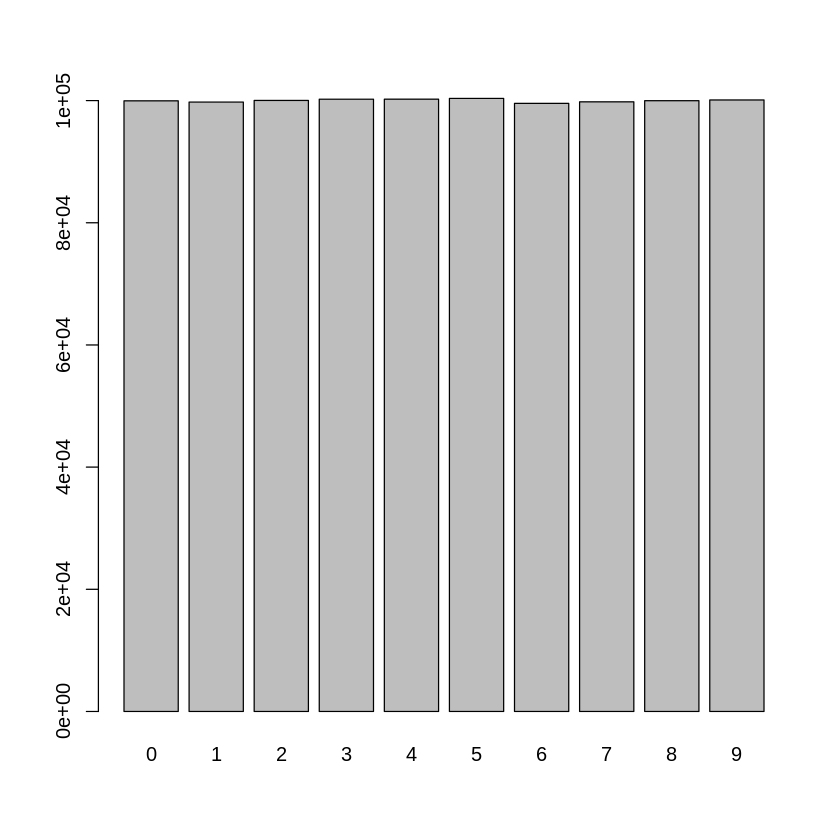

In [14]:
data = readLines("pi.txt")
x = strsplit(data, "")
x = c(as.numeric(unlist(x)))
table(x)
barplot(table(x))

+ 首先將圓周率後的一百萬位數存成副檔名為.txt的文件，再使用 R 內建的`readLines()`指令讀取，由於用數字存取會使內存不足，所以使用字串的方式處理，再使用`strsplit()` 把一個文字字串切割成一百萬個字串，再使用`as.numeric()`轉換成數字針對數字做處理，利用`table()`統計 0~9 的數字個出現幾次。

2.(b)

Apply the appropriate tools to test if the random numbers from (a) satisfy the assumption of random numbers.

In [17]:
chisq.test(table(x))


	Chi-squared test for given probabilities

data:  table(x)
X-squared = 5.5091, df = 9, p-value = 0.7879


In [16]:
print(up_and_down_test(table(x)))

[1] 0.9971354


+ 做檢定，由結果可知其實出現的頻率足夠均勻，這點在檢定上也體現出來。作檢定，由結果可知其實出現的頻率足夠均勻，這點在檢定上也體現出來。

+ 做獨立性檢定，從p-value來看不拒絕虛無假設，故數據間的獨立。

+ 由已知所有樣本來自均勻分配且有獨立性，$\pi$小數點後的一百萬位足夠隨機。

3 

The following table shows the winning numbers of first 20 Taiwan Lottery (starting in 2002), which picks 6 numbers from 42 balls plus a “Power Ball.” Choose your tools to check whether these winning numbers are random.

|Date|Winning Numbers|Power Ball|Date|Winning Numbers|Power Ball|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0329|22, 31, 34, 25, 21, 19|13|0222|32, 10, 15, 02, 30, 23|36|
|0326|05, 18, 25, 26, 35, 42|29|0219|24, 20, 36, 19, 07, 12|26|
|0321|32, 21, 09, 27, 31, 06|2|0215|01, 06, 07, 12, 42, 20|26|
|0319|05, 25, 02, 16, 32, 09|7|0212|25, 39, 20, 38, 29, 37|28|
|0315|15, 29, 05, 36, 13, 10|1|0208|26, 02, 15, 29, 04, 33|39|
|0312|36, 16, 12, 26, 08, 34|5|0205|17, 39, 03, 15, 11, 01|34|
|0308|04, 40, 27, 21, 14, 05|12|0201|13, 39, 28, 30, 25, 29|21|
|0305|29, 04, 10, 23, 39, 14|36|0129|07, 09, 29, 34, 39, 36|16|
|0301|30, 12, 40, 32, 35, 20|34|0125|28, 31, 16, 35, 06, 30|2|
|0226|40, 06, 20, 29, 38, 35|41|0122|10, 32, 13, 04, 09, 33|37|

Warning message in chisq.test(table(numbers)):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  table(numbers)
X-squared = 36.4, df = 41, p-value = 0.6751


[1] 0.9467417


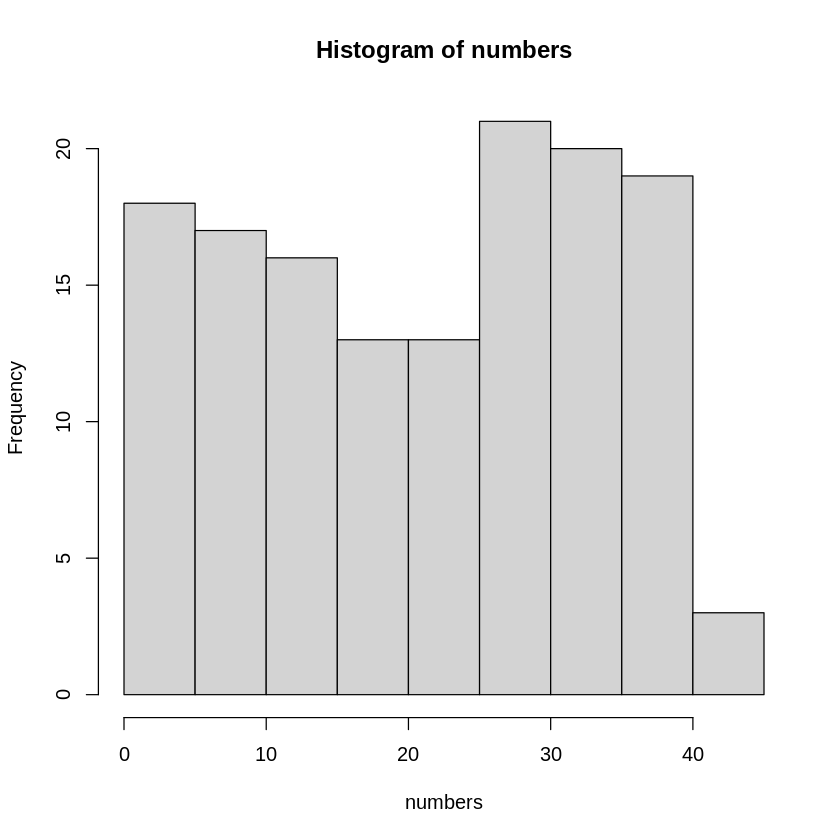

In [20]:
df = read.table("data.txt")
df = unlist(df)
numbers = as.vector(as.matrix(df))
t = table(numbers)
chisq.test(table(numbers))
print(up_and_down_test(numbers))
hist(numbers)

把 winning numbers 全部 pool 成一群，使用 chisq.test() 去檢定是否每個數字出現的機率 相等，檢定結果明顯的不拒絕每個數字出現的機率相等的假設，且做 up and down test，由 p-value 可知數字獨立，故足夠此樂透號碼足夠 random。

4.(a)

Test the generation methods of normal distribution introduced in class, i.e., Box- Muller, Polar, Ratio-of-uniform, and also the random number generators from R. Based on your simulation results, choose the “best” generator.


	One-sample Kolmogorov-Smirnov test

data:  normal_number
D = 0.0053475, p-value = 0.9373
alternative hypothesis: two-sided


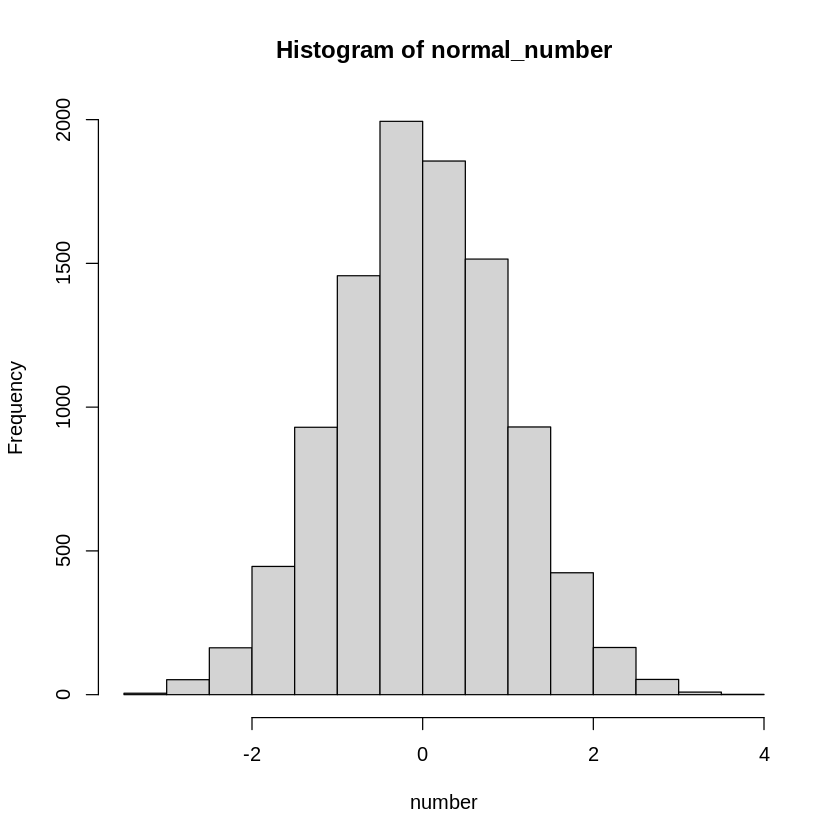

In [ ]:
# 4.a
# sum 12 Ui minus 6
random_number = matrix(runif(120000), nrow = 12, byrow = TRUE)
normal_number = apply(random_number, 2, sum) - 6
hist(normal_number, xlab = "number")
ks.test(normal_number, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.0050812, p-value = 0.9585
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  Y
D = 0.0058748, p-value = 0.8804
alternative hypothesis: two-sided


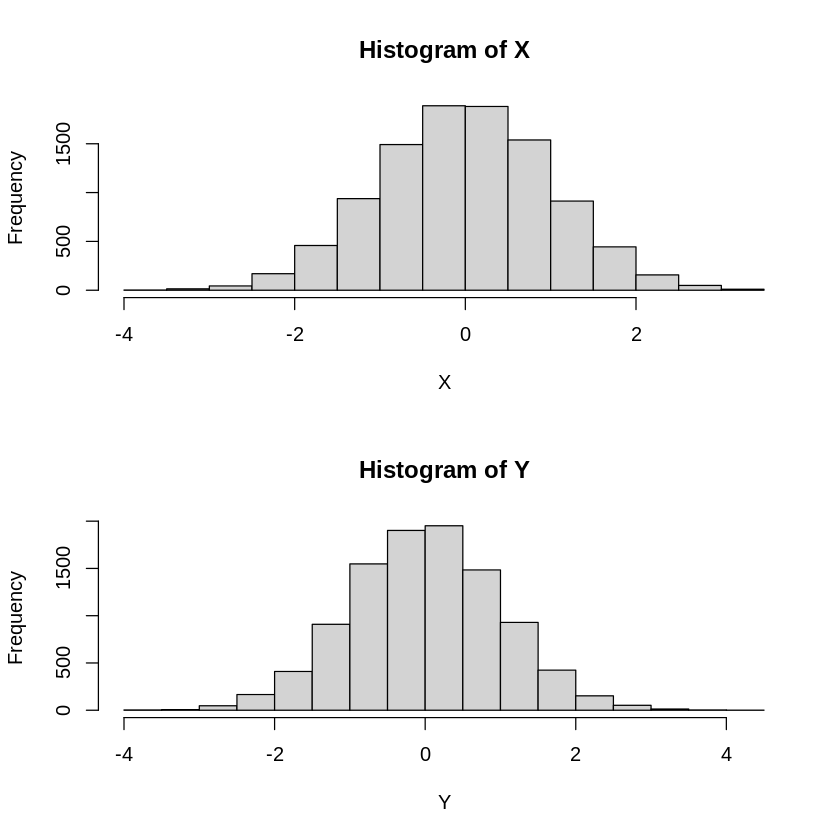

In [ ]:
# 4.a
# Box-Muller
U1 = runif(10000)
U2 = runif(10000)
theta = 2 * pi * U1
E = -log(U2)
R = sqrt(2 * E)
X = R * cos(theta)
Y = R * sin(theta)

par(mfrow = c(2, 1))
hist(X, xlab = "X")
hist(Y, xlab = "Y")
ks.test(X, "pnorm")
ks.test(Y, "pnorm")

Warning message in sqrt(-2 * w^(-1) * log(w)):
“NaNs produced”



	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.0073232, p-value = 0.7882
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  Y
D = 0.0068764, p-value = 0.8471
alternative hypothesis: two-sided


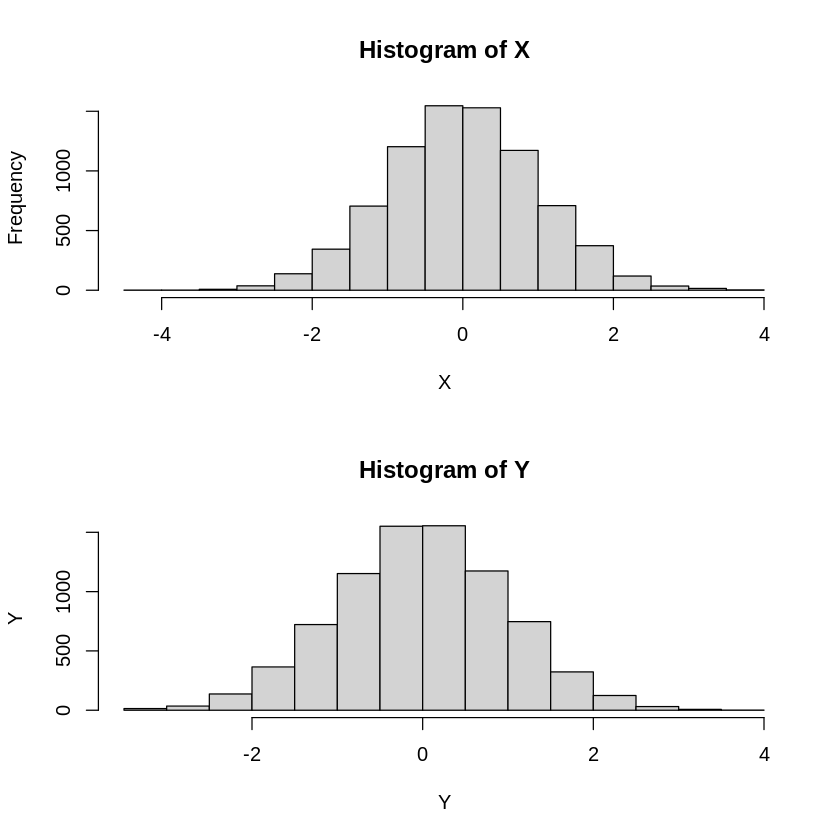

In [ ]:
# Polar Method
v1 = runif(10000, -1, 1)
v2 = runif(10000, -1, 1)
w = v1^2 + v2^2
note = (w < 1) * 1:10000
note = note[note > 0]
C = sqrt(-2 * w^(-1) * log(w))
X = C * v1
Y = C * v2

par(mfrow = c(2, 1))
hist(X, xlab = "X")
hist(Y, ylab = "Y")
ks.test(X, "pnorm")
ks.test(Y, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.0062256, p-value = 0.9398
alternative hypothesis: two-sided


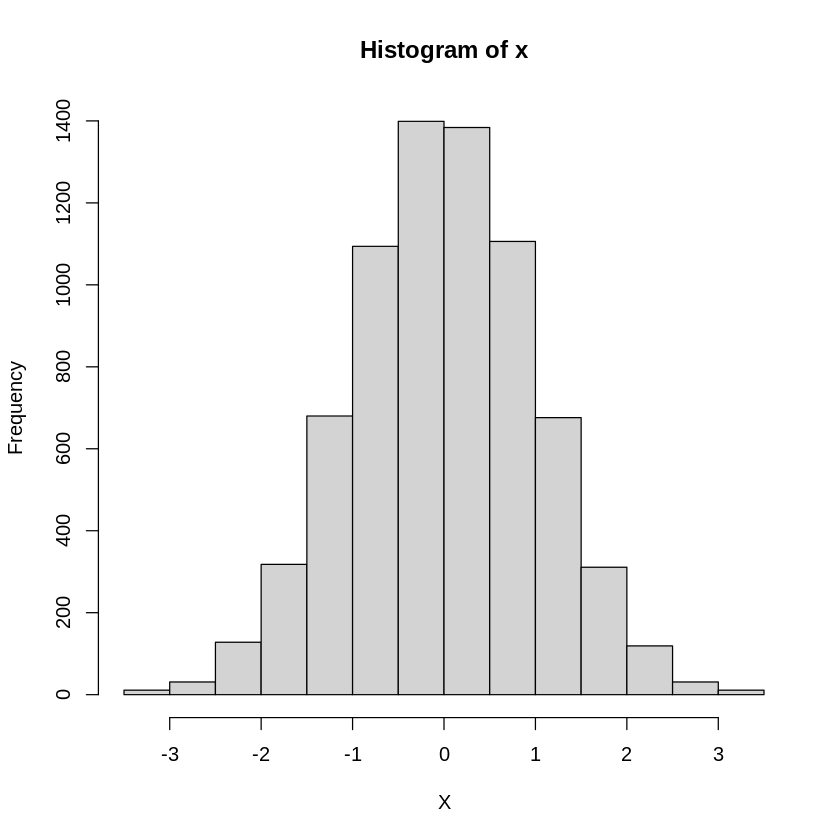

In [ ]:
# Ratio of Uniform
u1 = runif(10000)
u2 = runif(10000)
v = sqrt(2/exp(1)) * (2 * u2 - 1)
x = v / u1
z = x^2 / 4
z = (z <= 0.259 / u1 + 0.35 & z <= -log(u1)) * 1:10000
z = z[z > 0]
x = x[z]

hist(x, xlab = "X")
ks.test(x, "pnorm")

+ 以上四種方法在分配形狀、檢定結果上，都不拒絕它是常態分配，究竟要如何去判斷哪一個方法較好，我們決定對每個方法模擬 1000 次觀察每個方法p-value低於特定$\alpha$值的個數，觀察四個方法的表現。

[1] 134  81  98  99
[1] 72 47 40 47
[1] 38 23 16 25
[1] 13 10  7 13


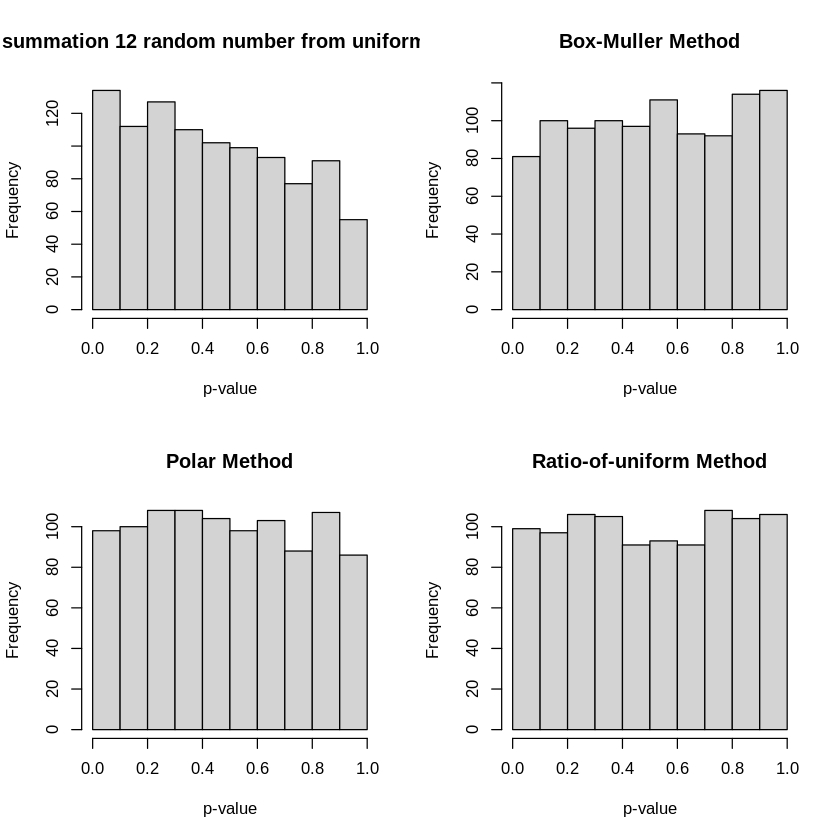

In [ ]:
options(warn = -1)
pval1 = NULL
pval2 = NULL
pval3 = NULL
pval4 = NULL
par(mfrow = c(2, 2))
for (i in 1:1000){
    # method 1
    random_number = matrix(runif(120000), nrow = 12, byrow = TRUE)
    normal_number = apply(random_number, 2, sum) - 6
    pval1[i] = ks.test(normal_number, "pnorm")[2]
    
    # box muller
    U1 = runif(10000)
    U2 = runif(10000)
    theta = 2 * pi * U1
    E = -log(U2)
    R = sqrt(2 * E)
    X_1 = R * cos(theta)
    Y_1 = R * sin(theta)
    pval2[i] = ks.test(X_1, "pnorm")[2]
    
    # Polar Method
    v1 = runif(10000, -1, 1)
    v2 = runif(10000, -1, 1)
    w = v1^2 + v2^2
    note = (w < 1) * 1:10000
    note = note[note > 0]
    C = sqrt(-2 *  log(w) / w)
    X = C * v1
    Y = C * v2
    pval3[i] = ks.test(X, "pnorm")[2]
    
    # Ratio of Uniform
    u1 = runif(10000)
    u2 = runif(10000)
    v = sqrt(2/exp(1)) * (2 * u2 - 1)
    x = v / u1
    z = x^2 / 4
    z = (z <= 0.259 / u1 + 0.35 & z <= -log(u1)) * 1:10000
    z = z[z > 0]
    x = x[z]
    pval4[i] = ks.test(x, "pnorm")[2]
}

pval_1 = unlist(pval1)
pval_2 = unlist(pval2)
pval_3 = unlist(pval3)
pval_4 = unlist(pval4)

pval_1_01 = length(pval_1[pval_1 < 0.1])
pval_2_01 = length(pval_2[pval_2 < 0.1])
pval_3_01 = length(pval_3[pval_3 < 0.1])
pval_4_01 = length(pval_4[pval_4 < 0.1])

pval_1_005 = length(pval_1[pval_1 < 0.05])
pval_2_005 = length(pval_2[pval_2 < 0.05])
pval_3_005 = length(pval_3[pval_3 < 0.05])
pval_4_005 = length(pval_4[pval_4 < 0.05])

pval_1_0025 = length(pval_1[pval_1 < 0.025])
pval_2_0025 = length(pval_2[pval_2 < 0.025])
pval_3_0025 = length(pval_3[pval_3 < 0.025])
pval_4_0025 = length(pval_4[pval_4 < 0.025])

pval_1_001 = length(pval_1[pval_1 < 0.01])
pval_2_001 = length(pval_2[pval_2 < 0.01])
pval_3_001 = length(pval_3[pval_3 < 0.01])
pval_4_001 = length(pval_4[pval_4 < 0.01])

c1 = c(pval_1_01, pval_2_01, pval_3_01, pval_4_01)
c2 = c(pval_1_005, pval_2_005, pval_3_005, pval_4_005)
c3 = c(pval_1_0025, pval_2_0025, pval_3_0025, pval_4_0025)
c4 = c(pval_1_001, pval_2_001, pval_3_001, pval_4_001)

print(c1)
print(c2)
print(c3)
print(c4)

hist(unlist(pval1), main = "summation 12 random number from uniform - 6", xlab = "p-value")
hist(unlist(pval2), main = "Box-Muller Method", xlab = "p-value")
hist(unlist(pval3), main = "Polar Method", xlab = "p-value")
hist(unlist(pval4), main = "Ratio-of-uniform Method", xlab = "p-value")

+ 從設定不同$\alpha$值下，拒絕虛無假設的次數來看，四種方式的優劣中，只有相加 12 個均勻分配生成的亂數減去六的這個方法表現相對於其他不好，其他三個方法經過模擬出來的結果相去不遠，足見 Box-Muller、Polar Method、Ratio of uniform Method 的表現都還可以，足以當成一個穩定的生成常態分配的方法。

4.(b) 

In the class we mentioned it is found by several researchers that

a (multiplier) = 131, c (increment) = 0, m (modulus) = 2^35

would have X $\in$ (–3.3,3.6), if plugging congruential generators into the Box-Muller method. Verify if you would have similar results.

[1] -3.928914  5.034282
[1] -3.932479  3.771747


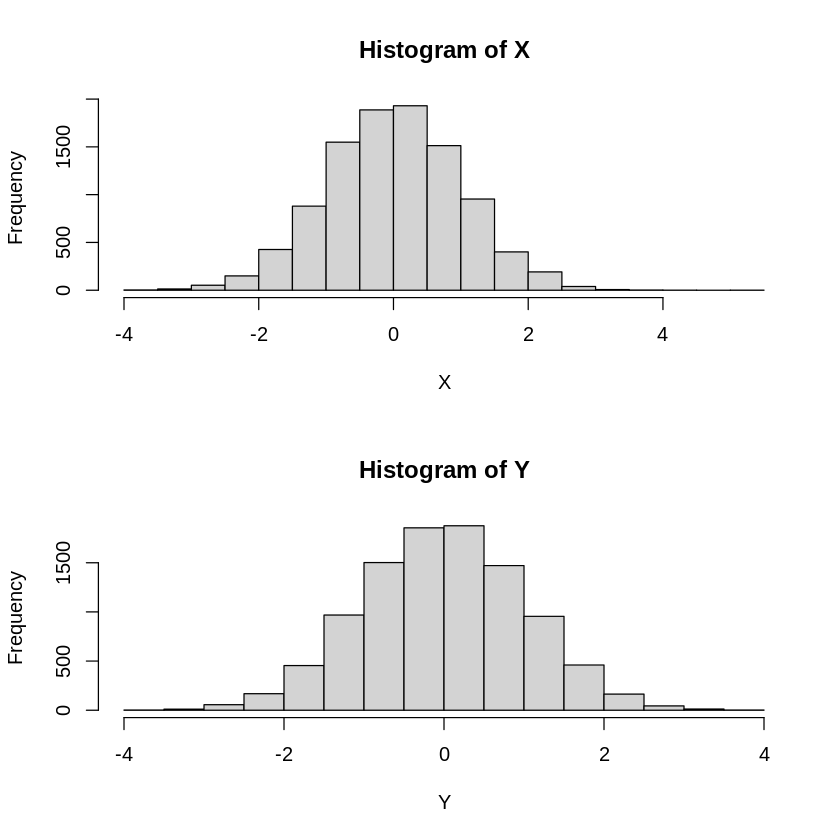

In [ ]:
LCG_generator = function(seed, n){
  num = seed
  s = NULL
  for (i in 1:n){
    num = (num * 131) %% (2^35)
    s[i] = num
  }
  return (s)
}

# Box-Muller
set.seed(111)
seed = sample(100:999, 2)
U1 = (LCG_generator(seed[1], 10000) / (2^35))
U2 = (LCG_generator(seed[2], 10000) / (2^35))
theta = 2 * pi * U1
E = -log(U2)
R = sqrt(2 * E)
X = R * cos(theta)
Y = R * sin(theta)

par(mfrow = c(2, 1))
hist(X, xlab = "X")
hist(Y, xlab = "Y")
print(range(X))
print(range(Y))

+ 由模擬結果可以看到，當使用同餘法且 a (multiplier) = 131、c (increment)、m (modulus) = 2^35 時，並沒有出現 X 或 Y 只落在 (-3.3, 3.6) 之間的現象。

5.(a)

Using Rejection Method (or Inversion) described in the class, to generate random numbers from Cauchy distribution. (Note: You need to check the goodness- of-fit and independence.)

[1] 0.9822717



	One-sample Kolmogorov-Smirnov test

data:  X
D = 0.0067734, p-value = 0.7486
alternative hypothesis: two-sided


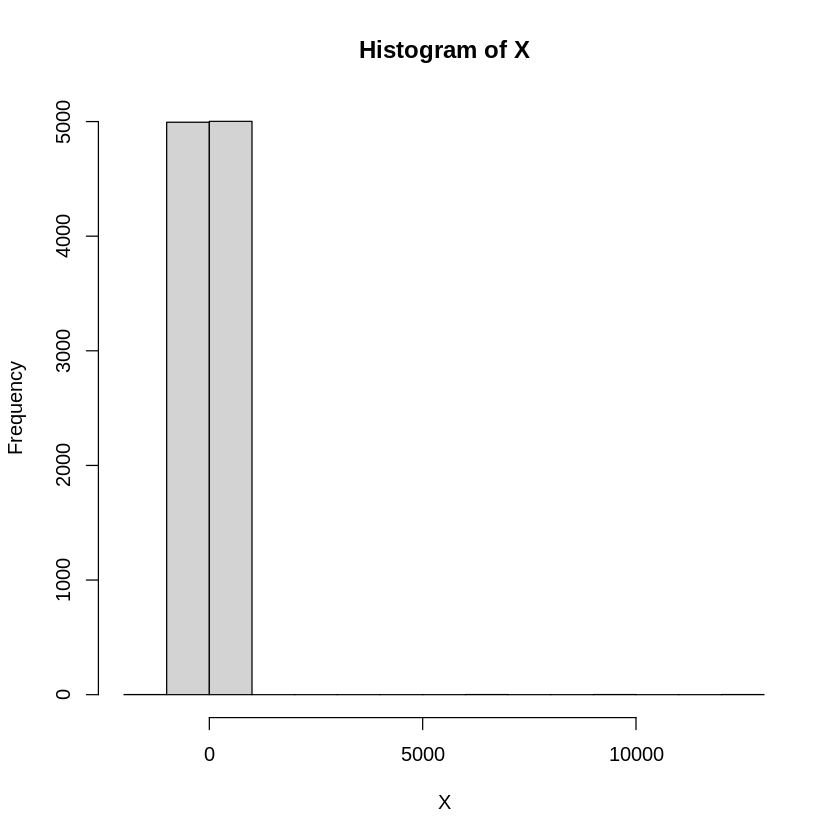

In [ ]:
# inversion method to generator cauchy random number
U = runif(10000)
X = tan(pi * (U - 1/2))
hist(X)
# test the independence
print(up_and_down_test(X))
# test the goodness-of-fit
ks.test(X, "pcauchy")

+ 使用 Inversion Method 去生成抽自 Cauchy distribution 亂數，再使用 run test 以及 ks test 分別去檢定其獨立性與適合度，結果皆不顯著，可確保在亂數生成的使用上無虞。

5.(b)

Compare with the methods of “Ratio of Uniform” (in-class) and “Ratio of Normal” and give your suggestion (such as choosing the “best” method) for creating random numbers from Cauchy distribution.

[1] 112  99  96
[1] 54 50 50
[1] 28 26 29
[1]  8 10 12


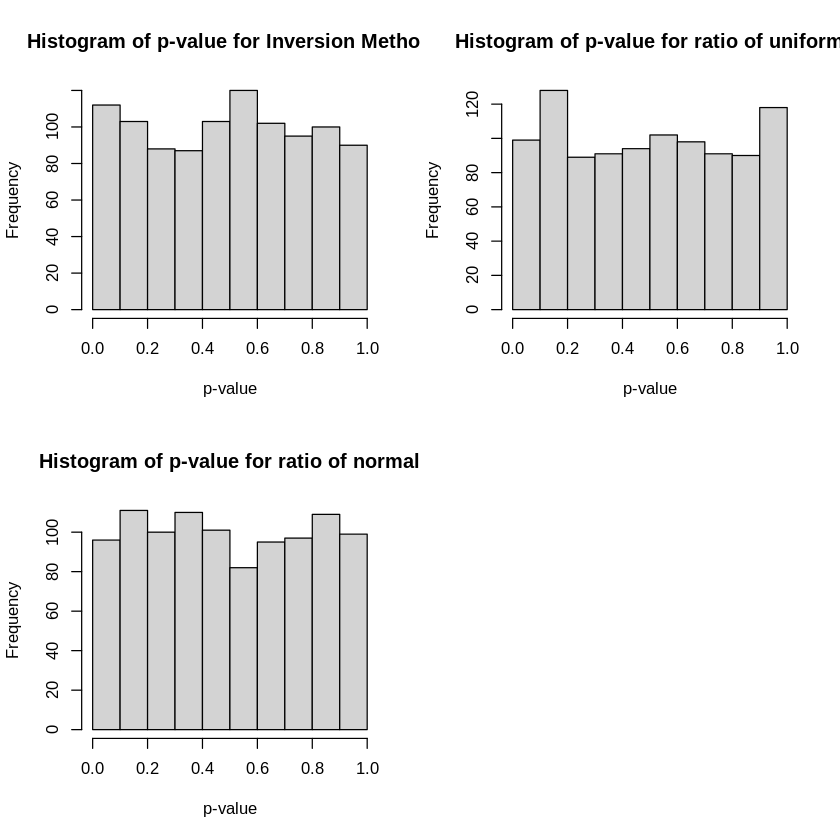

In [ ]:
p_val1 = NULL
p_val2 = NULL
p_val3 = NULL

for (i in 1:1000){
    # inversion method to generator cauchy random number
    U = runif(10000)
    Cauchy_number1 = tan(pi * (U - 1/2))

    # ratio of uniform
    U1 = runif(10000)
    U2 = runif(10000)
    V = 2 * U2 - 1
    z = (U1^2 + V^2 < 1) * 1
    Cauchy_number2 = V / U1
    Cauchy_number2 = Cauchy_number2[z > 0]

    # ratio of normal
    N1 = rnorm(10000)
    N2 = rnorm(10000)
    Cauchy_number3 = N1 / N2

    p_val1[i] = ks.test(Cauchy_number1, "pcauchy")[2]
    p_val2[i] = ks.test(Cauchy_number2, "pcauchy")[2]
    p_val3[i] = ks.test(Cauchy_number3, "pcauchy")[2]
}

p_val1 = unlist(p_val1)
p_val2 = unlist(p_val2)
p_val3 = unlist(p_val3)

number_p_val1_01 = length(p_val1[p_val1 < 0.1])
number_p_val2_01 = length(p_val2[p_val2 < 0.1])
number_p_val3_01 = length(p_val3[p_val3 < 0.1])

number_p_val1_005 = length(p_val1[p_val1 < 0.05])
number_p_val2_005 = length(p_val2[p_val2 < 0.05])
number_p_val3_005 = length(p_val3[p_val3 < 0.05])

number_p_val1_0025 = length(p_val1[p_val1 < 0.025])
number_p_val2_0025 = length(p_val2[p_val2 < 0.025])
number_p_val3_0025 = length(p_val3[p_val3 < 0.025])

number_p_val1_001 = length(p_val1[p_val1 < 0.01])
number_p_val2_001 = length(p_val2[p_val2 < 0.01])
number_p_val3_001 = length(p_val3[p_val3 < 0.01])

print(c(number_p_val1_01, number_p_val2_01, number_p_val3_01))
print(c(number_p_val1_005, number_p_val2_005, number_p_val3_005))
print(c(number_p_val1_0025, number_p_val2_0025, number_p_val3_0025))
print(c(number_p_val1_001, number_p_val2_001, number_p_val3_001))

par(mfrow = c(2, 2))
hist(p_val1, xlab = "p-value", main = "Histogram of p-value for Inversion Method")
hist(p_val2, xlab = "p-value", main = "Histogram of p-value for ratio of uniform")
hist(p_val3, xlab = "p-value", main = "Histogram of p-value for ratio of normal")

+ 此題一樣使用模擬多次觀察 p-value 低於特定$\alpha$值的次數，以此標準來評斷何種方法較優良，經過模擬與觀察，以寬鬆的標準來說，此三者方式的落差次數相較於我們模擬的次數來說，其實看起來還算可以接受，即便略有落差，但能足見三者方式足以滿足生成柯西分配亂數的需求。

6.

Write a program to check the Table method and the Alias method for generating r.v. from B(3,1\3). Also, compare the speed of generation for the two methods.

In [ ]:
# table method
table_method = function(n){
    s = NULL
    for (i in 1:n){
        # 隨機生一個 0 ~ 1 的數字 
        init = runif(1)
        
        first_decimal = c(rep(0, 2), rep(1, 4), rep(2, 2))
        second_decimal = c(rep(0, 9), rep(1, 4), rep(2, 2), rep(3, 3))
        third_decimal = c(rep(0, 6), rep(1, 5), rep(2, 2), rep(3, 7))
        
        all = list(first_decimal, second_decimal, third_decimal)
        value = c(0, 0.8, 0.98)
        
        # for test
        # total = (init > value)
        total = sum(init > value)
        number = unlist(all[total])
        pick = sample(number, 1)
        s = c(s, pick)
    }
    return (s)
}
proc.time()
x = table_method(10000)
t = table(x)
print(t / 10000)

   user  system elapsed 
116.379   0.614 152.397 

x
     0      1      2      3 
0.2921 0.4431 0.2289 0.0359 


+ 可以看出Table Method模擬出來的結果與理論機率值十分接近了，是一個很優秀的模擬方法。

In [ ]:
# alias method
alias_table = function(area_ratio, n){
  # area_ratio[i] 事件i出現的機率
  N = length(area_ratio)
  accept = rep(0, each = N)
  alias = rep(0, each = N)
  area_ratio_ = area_ratio * N #機率乘上事件個數
  small = which(area_ratio_ < 1)
  large = which(area_ratio_ >= 1)
  
  # 柱狀圖
  
  while ((length(small) != 0) & (length(large) != 0)){
    small_idx = small[1]
    small = small[-1]
    large_idx = large[1]
    large = large[-1]
    
    accept[small_idx] = area_ratio_[small_idx]
    alias[small_idx] = large_idx
    
    # 用大的把小的補到1
    area_ratio_[large_idx] = area_ratio_[large_idx] - (1 - area_ratio_[small_idx])
    
    if (area_ratio_[large_idx] < 1){
      small = append(small, large_idx, 0)
    }else{
      large = append(large, large_idx, 0)
    }
  }
  
  while (length(large) != 0){
    large_idx = large[1]
    large = large[-1]
    accept[large_idx] = 1
  }
  
  while (length(small) != 0){
    small_idx = small[1]
    small = small[-1]
    accept[small_idx] = 1
  }
  
  
  # 模擬
  result = NULL
  for (i in c(1:n)){
    k = sample(1:N, 1)
    r = runif(1)
    if (r < accept[k]){
      result = append(result, k, i)
    }else{
      result = append(result, alias[k], i)
    }
  }
  
  return(result)
}

area_ratio = c(8/27, 12/27, 6/27, 1/27)
x = alias_table(area_ratio, 10000) - 1
proc.time()
t = table(x)
print(t / 10000)

   user  system elapsed 
117.075   0.694 153.177 

x
     0      1      2      3 
0.2936 0.4480 0.2227 0.0357 


In [ ]:
alias_method = function(n){
    med = NULL
    for (i in 1:n){
        four_number = floor(4 * runif(1))
        under_2_27 = (runif(1) < 2/27) * 1
        under_3_27 = (runif(1) < 3/27) * 1
        under_23_27 = (runif(1) < 23/27) * 1
        move = c(0, 1, 2, 2) * c(0, under_2_27, under_3_27, under_23_27)
        result = four_number - move[c(four_number + 1)]
        med = c(med, result)
    }
    return (med)
}

x = alias_method(10000)
table = table(x) / 10000
table

x
     0      1      2      3 
0.2965 0.4498 0.2162 0.0375 

+ 由模擬結果可以看出，Alias Method 的結果和理論的機率非常相近，與 Table Method 一樣有良好的模擬結果。而在時間上，兩者的運算時間差異也不大

7.(Bonus!) 

There are no standard methods for testing independence of random
numbers. Still, we can use computer simulation to check the methods introduced
in class if they have larger powers for detecting dependence between observations.
You may apply AR(1) or AR(2) to the observations, by allowing the correlation
coefficients varying from 0 to 1.Note : Forobservations {$Y_t$, 𝑡=1,2,...} satisfying i.i.d.
AR(1), we have $Y_{t+1} = \rho Y_t + \epsilon_{t+1}, \, \epsilon_{t} \sim N(0, \sigma^2)$ and $-1<\rho<1$.

[1] 0.4719012
[1] 0.9861077


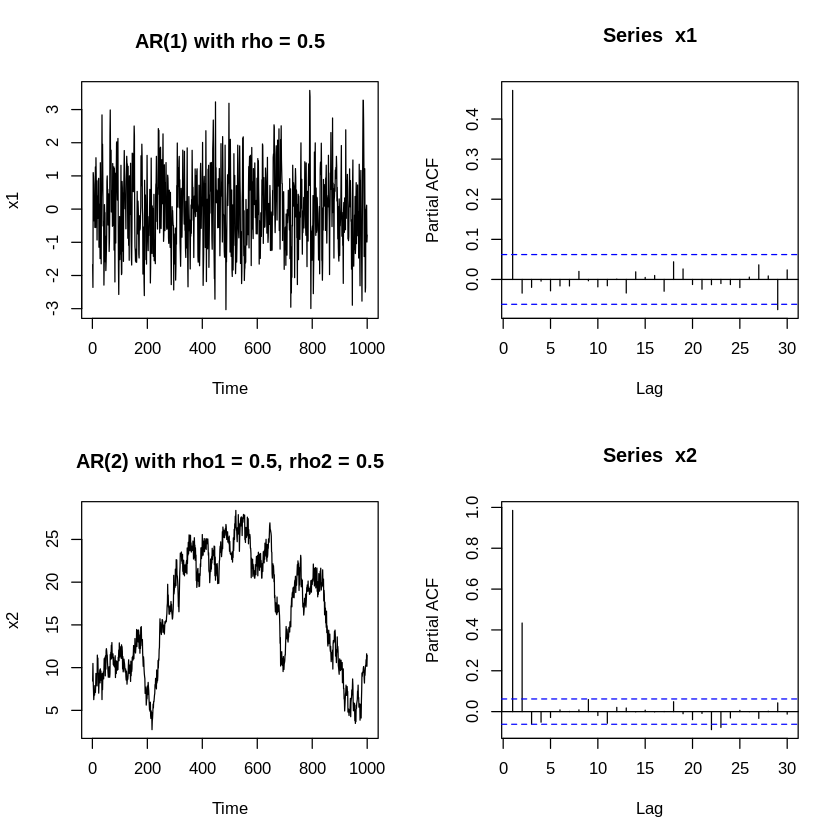

In [ ]:
# n: length of output we need
# rho: auto-regression coefficient
# sigma: the standard deviation of eplison
# n0: the discard part of the initial

AR = function(n, rho, sigma = 1, n0 = 1000){
  n2 <- n0 + n
  p <- length(rho)
  arev <- rev(rho)
  x2 <- numeric(n2)
  eps <- rnorm(n2, 0, sigma)
  for(t in seq(p+1, n2)){
    x2[t] <- eps[t] + sum(x2[(t - p):(t - 1)] * arev)
  }
  x <- x2[(n0 + 1):n2]
  x <- ts(x)
  attr(x, "model") <- "AR"
  attr(x, "rho") <- rho
  attr(x, "sigma") <- sigma
  x
}

x1 = AR(n = 1000, rho = 0.5, sigma = 1)
x2 = AR(n = 1000, rho = c(0.5, 0.5), sigma = 1)
print(cor(x1[-1], x1[-1000]))
print(cor(x2[-1], x2[-1000]))


par(mfrow = c(2, 2))
plot(x1, main = "AR(1) with rho = 0.5")
pacf(x1)

plot(x2, main = "AR(2) with rho1 = 0.5, rho2 = 0.5")
pacf(x2)

做了兩種模型，AR(1)的模型參數為$\rho = 0.5$，而AR(2)的模型參數為$\rho_1 = 0.5$,$\rho_2=0.5$，分別對兩個模型繪圖，可以發現AR(1)前後兩個數值的相關性很高，而AR(2)又更高了，dependency非常強烈。